# Generate Visualizations

In [1]:
import requests
from datetime import datetime
from tabulate import tabulate
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

/home/jml/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Input

In [30]:
# Primary input

topic='bioinformatics'

In [13]:
stats_repo_pl_vs_topic_df_path='../data/programming_language_x_'+topic+'.csv'
stats_repo_topics_vs_topic_df_path='../data/topics_x_'+topic+'.csv'
list_of_repos_path='../data/list_of_repos_'+topic+'.csv'

## Output

In [37]:
hist_stars_png='../figure/star_distrib.png'

bar_chat_pl_vs_topic_video='../figure/programming_language_x_'+topic+'.mp4'
bar_chat_pl_vs_topic_video_full='../figure/programming_language_x_'+topic+'_full.mp4'

bar_chat_topics_vs_topic_video='../figure/topics_x_'+topic+'.mp4'
bar_chat_topics_vs_topic_video_full='../figure/topics_x_'+topic+'_20.mp4'

## Analysis

In [21]:
df_na_removed=pd.read_csv(list_of_repos_path, sep=';',header=0,on_bad_lines='skip')
df_stats_raw=pd.read_csv(stats_repo_pl_vs_topic_df_path, sep=';',header=0)
df_stats_topic_raw=pd.read_csv(stats_repo_topics_vs_topic_df_path, sep=';',header=0)

In [22]:
df_na_removed

,name,stars,created,forks,topics,language,selected_year
0,lh3/fermi,75,2012-01-06,15,"['bioinformatics', 'denovo-assembly', 'genomics']",C,2013
1,mpieva/mapping-iterative-assembler,19,2012-07-02,7,"['alignment', 'bioinformatics', 'consensus-cal...",C,2013
2,bio4j/bio4j,120,2011-01-31,19,"['bio4j', 'bio4j-titan', 'bioinformatics', 'da...",Java,2016
3,lh3/bfc,74,2014-12-30,12,"['bioinformatics', 'genomics']",TeX,2016
4,seandavi/ngCGH,18,2011-02-25,9,"['bioinformatics', 'cancer-genomics', 'genomic...",Python,2016
...,...,...,...,...,...,...,...
742,ACEnglish/truvari,393,2018-04-13,58,"['annotation-tool', 'benchmarking', 'bioinform...",Python,2025
743,brentp/vcfanno,392,2015-04-29,56,"['annotation', 'bioinformatics', 'genomics', '...",Go,2025
744,lh3/miniprot,390,2022-08-04,21,"['bioinformatics', 'sequence-alignment']",C,2025
745,bioconvert/bioconvert,386,2017-10-11,45,"['bam2cram', 'bam2sam', 'bcf2vcf', 'bigbed2bed...",Python,2025


In [23]:
# df_repos = pd.read_csv(list_of_repos_path, sep=';',header=0,on_bad_lines='skip')
# df_lang = pd.read_csv(stats_repo_pl_vs_topic_df_path, sep=';',header=0)
# df_topics = pd.read_csv(stats_repo_topics_vs_topic_df_path, sep=';',header=0)  

In [24]:


def search_github_repos(keywords, topic,min_stars, max_stars, start_date, end_date, token=None):
    
    # Build the query
    keywords_query = ' '.join(keywords)
    stars_query = f"stars:{min_stars}..{max_stars}"
    date_query = f"pushed:{start_date}..{end_date}"
    topic_query = f"topic:{topic}"
    
    query = f"{keywords_query} {stars_query} {date_query} {topic_query} "
    
    # GitHub API endpoint
    url = "https://api.github.com/search/repositories"
    
    # Headers
    headers = {
        "Accept": "application/vnd.github.v3+json"
    }
    
    if token:
        headers["Authorization"] = f"token {token}"
    
    # Parameters
    params = {
        "q": query,
        "sort": "stars",
        "order": "desc",
        "per_page": 100  # Max results per page
    }
    
    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        
        data = response.json()
        
        # Extract repository information
        repos = []
        for item in data.get('items', []):
            repo_info = {
                'name': item['full_name'],
                'stars': int(item['stargazers_count']),
                'created': datetime.strptime(item['created_at'], '%Y-%m-%dT%H:%M:%SZ').strftime('%Y-%m-%d'),
                'forks': int(item['forks_count']),
                'topics': item['topics'],
                'language': item['language'],
                'languages_url': item['languages_url'],
                'selected_year': int(start_date.split('-')[0])

            }
            repos.append(repo_info)
                    
        return repos, data.get('total_count', 0)
    
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return [], 0


In [25]:
print(len(df_na_removed))
df = pd.DataFrame(df_na_removed).reset_index(drop=True)
print(df)

747
                                   name  stars     created  forks  \
0                             lh3/fermi     75  2012-01-06     15   
1    mpieva/mapping-iterative-assembler     19  2012-07-02      7   
2                           bio4j/bio4j    120  2011-01-31     19   
3                               lh3/bfc     74  2014-12-30     12   
4                        seandavi/ngCGH     18  2011-02-25      9   
..                                  ...    ...         ...    ...   
742                   ACEnglish/truvari    393  2018-04-13     58   
743                      brentp/vcfanno    392  2015-04-29     56   
744                        lh3/miniprot    390  2022-08-04     21   
745               bioconvert/bioconvert    386  2017-10-11     45   
746                       OmicsML/dance    384  2022-06-07     37   

                                                topics language  selected_year  
0    ['bioinformatics', 'denovo-assembly', 'genomics']        C           2013  
1    

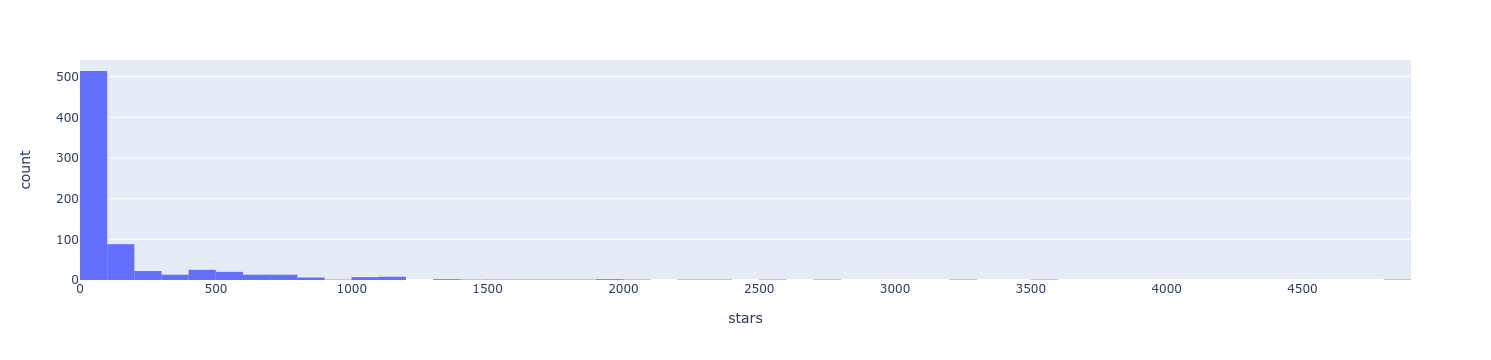

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [26]:
fig = px.histogram(df, x="stars")
fig.show()

pio.write_image(fig, hist_stars_png)

### Compute and Save Vidéo

In [27]:
import bar_chart_race as bcr
import matplotlib
# Set the path to your ffmpeg executable
# Replace '/usr/bin/ffmpeg' with your actual path, e.g., 'C:\\ffmpeg\\bin\\ffmpeg.exe' on Windows
matplotlib.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' 

df_stats_raw = df_stats_raw.sort_values(by='year')

df_stats_raw['year_string'] = [datetime.strptime(str(item)+'-01-01', "%Y-%m-%d") for item in list(df_stats_raw['year']) ]
df_wide = df_stats_raw.pivot(index='year_string', columns='language', values='stars')
df_wide.index.name='date'

bcr_fig=bcr.bar_chart_race(df_wide,  
                   filename=bar_chat_pl_vs_topic_video,
                   perpendicular_bar_func='mean', n_bars=10,
                   
                    title={
                        'label':'Most popular (most starred) programming languages in ' + topic+ ' from 2013 to 2025',
                        'size': 12,
                    },
                   shared_fontdict={'family': 'Helvetica', 'weight': 'bold',
                                    'color': 'rebeccapurple'}, 
                   interpolate_period=False,
                    period_template='%Y',
                   period_length=1100,
                fig_kwargs =
                    {
                        'figsize': (10, 5),
                        'dpi': 120,
                    }
                )


/home/jml/anaconda3/lib/python3.9/site-packages/bar_chart_race/_bar_chart_race.py:232: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



In [28]:
bcr_fig=bcr.bar_chart_race(df_wide,  
                   filename=bar_chat_pl_vs_topic_video_full,
                   perpendicular_bar_func='mean', 
                   
                    title={
                        'label':'Most popular (most starred) programming languages in ' + topic+ ' from 2013 to 2025',
                        'size': 12,
                    },
                   shared_fontdict={'family': 'Helvetica', 'weight': 'bold',
                                    'color': 'rebeccapurple'}, 
                   interpolate_period=False,
                    period_template='%Y',
                    #period_fmt='%Y',
                   period_length=1100,
                fig_kwargs =
                    {
                        'figsize': (10, 5),
                        'dpi': 120,
                    }
                 )

## Topics related to topic of refence


In [34]:
import bar_chart_race as bcr
import matplotlib
# Set the path to your ffmpeg executable
# Replace '/usr/bin/ffmpeg' with your actual path, e.g., 'C:\\ffmpeg\\bin\\ffmpeg.exe' on Windows
matplotlib.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' 

df_stats_topic_raw = df_stats_topic_raw.sort_values(by='year')

df_stats_topic_raw['year_string'] = [datetime.strptime(str(item)+'-01-01', "%Y-%m-%d") for item in list(df_stats_topic_raw['year']) ]
df_stats_topic_wide = df_stats_topic_raw.pivot(index='year_string', columns='topic', values='stars')
df_stats_topic_wide.index.name='date'

bcr_fig=bcr.bar_chart_race(df_stats_topic_wide,  
                   filename=bar_chat_topics_vs_topic_video,
                   perpendicular_bar_func='mean', n_bars=10,                   
                    title={
                        'label':'Topics strongly associated with ' + topic + ' from 2013 to 2025',
                        'size': 12,
                    },
                   shared_fontdict={'family': 'Helvetica', 'weight': 'bold',
                                    'color': 'rebeccapurple'}, 
                   interpolate_period=False,
                    period_template='%Y',
                   period_length=1100,
                    fig_kwargs =
                    {
                        'figsize': (10, 5),
                        'dpi': 120,
                    }
                )



/home/jml/anaconda3/lib/python3.9/site-packages/bar_chart_race/_bar_chart_race.py:232: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



In [38]:
import bar_chart_race as bcr
import matplotlib
# Set the path to your ffmpeg executable
# Replace '/usr/bin/ffmpeg' with your actual path, e.g., 'C:\\ffmpeg\\bin\\ffmpeg.exe' on Windows
matplotlib.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' 

df_stats_topic_raw = df_stats_topic_raw.sort_values(by='year')

df_stats_topic_raw['year_string'] = [datetime.strptime(str(item)+'-01-01', "%Y-%m-%d") for item in list(df_stats_topic_raw['year']) ]
df_stats_topic_wide = df_stats_topic_raw.pivot(index='year_string', columns='topic', values='stars')
df_stats_topic_wide.index.name='date'

bcr_fig=bcr.bar_chart_race(df_stats_topic_wide,  
                   filename=bar_chat_topics_vs_topic_video_full,
                   perpendicular_bar_func='mean', n_bars=20,                   
                    title={
                        'label':'Topics strongly associated with ' + topic + ' from 2013 to 2025',
                        'size': 12,
                    },
                   shared_fontdict={'family': 'Helvetica', 'weight': 'bold',
                                    'color': 'rebeccapurple'}, 
                   interpolate_period=False,
                    period_template='%Y',
                   period_length=1100,
                    fig_kwargs =
                    {
                        'figsize': (10, 5),
                        'dpi': 120,
                    }
                )


/home/jml/anaconda3/lib/python3.9/site-packages/bar_chart_race/_bar_chart_race.py:232: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

